<a href="https://colab.research.google.com/github/mvharsh/Applied-Statistics-with-Python/blob/main/CNN/Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extracting Dataset using Kaggle API**

In [ ]:
# installing the Kaggle library
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vharshini","key":"e103dcfa647f2e4c04b3593fd7c3be7d"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

**Importing the Rock Paper Scissor Dataset from Kaggle**

In [ ]:
# Kaggle api
!kaggle datasets download -d sanikamal/rock-paper-scissors-dataset

100% 452M/452M [00:20<00:00, 20.7MB/s]
100% 452M/452M [00:20<00:00, 23.5MB/s]


In [ ]:
!ls

kaggle.json  rock-paper-scissors-dataset.zip  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/rock-paper-scissors-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import numpy as np
import pandas as pd

import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

**Loading Data**

In [ ]:
widht = 75
height = 75

In [ ]:
PATH = "/content/rock-paper-scissors/Rock-Paper-Scissors/"
train_dir = os.path.join(PATH+"train")
train = keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(widht,height),validation_split=0.2,seed=42,subset="training")
validation = keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(widht,height),validation_split=0.2,seed=42,subset="validation")
test_dir = os.path.join(PATH,"test")
test = keras.preprocessing.image_dataset_from_directory(test_dir,image_size=(widht,height))

Found 2520 files belonging to 3 classes.
Using 2016 files for training.
Found 2520 files belonging to 3 classes.
Using 504 files for validation.
Found 372 files belonging to 3 classes.


**Visualing Images**

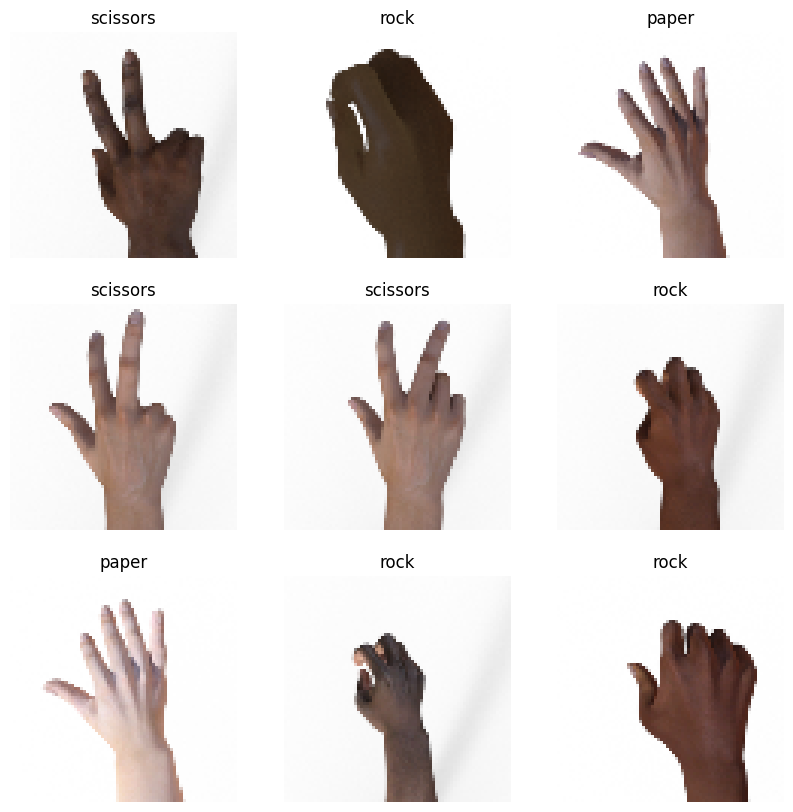

In [ ]:
plt.figure(figsize=(10,10))

for images,labels in train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train.class_names[labels[i]])
        plt.axis(False)

**Creating CNN Model**

In [ ]:
scaler = keras.Sequential([keras.layers.experimental.preprocessing.Rescaling(1/255)])

In [ ]:
model = keras.Sequential([ scaler,
keras.layers.Conv2D(32,kernel_size=3,strides=2,input_shape=(224, 224, 3),activation="relu"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(64,kernel_size=3,strides=2,activation="relu"),
keras.layers.MaxPooling2D(2),
keras.layers.SpatialDropout2D(0.2),
keras.layers.Conv2D(128,kernel_size=3,strides=1,activation="relu"),
keras.layers.MaxPooling2D(2),
keras.layers.SpatialDropout2D(0.2),
keras.layers.Flatten(),
keras.layers.Dense(50,activation="relu"),
keras.layers.Dropout(0.2),
keras.layers.Dense(3,activation="softmax")

])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history = model.fit(train,validation_data=validation,epochs=10)

Epoch 1/10
63/63 [==============================] - 9s 103ms/step - loss: 1.0141 - accuracy: 0.4658 - val_loss: 0.7367 - val_accuracy: 0.7004
Epoch 2/10
63/63 [==============================] - 8s 118ms/step - loss: 0.4505 - accuracy: 0.8328 - val_loss: 0.1144 - val_accuracy: 0.9901
Epoch 3/10
63/63 [==============================] - 8s 122ms/step - loss: 0.1588 - accuracy: 0.9544 - val_loss: 0.0454 - val_accuracy: 0.9940
Epoch 4/10
63/63 [==============================] - 8s 112ms/step - loss: 0.0659 - accuracy: 0.9866 - val_loss: 0.0211 - val_accuracy: 0.9960
Epoch 5/10
63/63 [==============================] - 8s 128ms/step - loss: 0.0403 - accuracy: 0.9881 - val_loss: 0.0096 - val_accuracy: 0.9960
Epoch 6/10
63/63 [==============================] - 7s 104ms/step - loss: 0.0236 - accuracy: 0.9940 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 7/10
63/63 [==============================] - 8s 120ms/step - loss: 0.0196 - accuracy: 0.9965 - val_loss: 0.0098 - val_accuracy: 0.9980
Epoch 

**Visualizing Models Performance**

In [ ]:
model.evaluate(test)

12/12 [==============================] - 1s 26ms/step - loss: 0.4999 - accuracy: 0.9140


[0.4999486804008484, 0.9139785170555115]

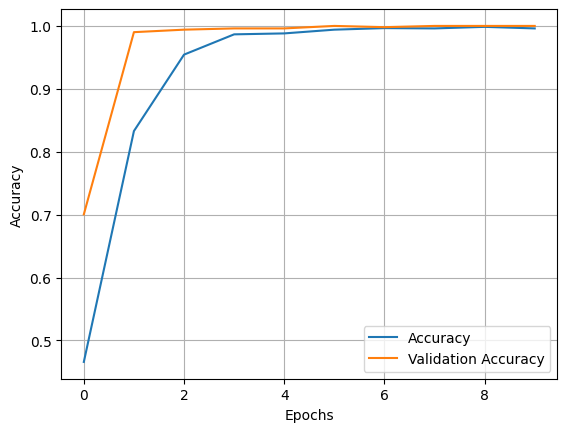

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()

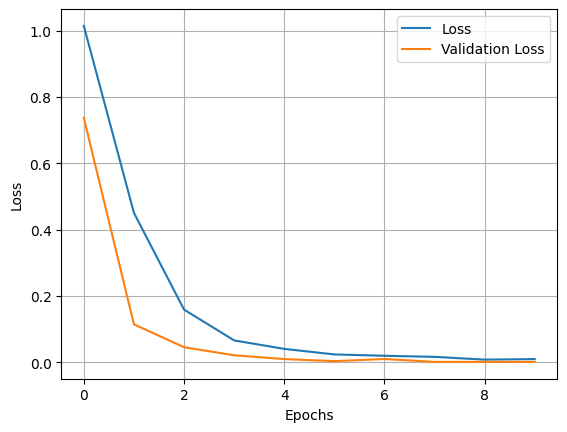

In [ ]:
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Evaluate the model on the test set
results = model.evaluate(test)

# Extract true labels from the test dataset
true_labels = np.concatenate([y for x, y in test], axis=0)

# Predict the labels for the test set
y_pred = model.predict(test)

# Assuming binary classification, convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

classes = ["paper", "rock", "scissors"]

12/12 [==============================] - 1s 24ms/step


In [ ]:
# Generate and print the classification report
print("Classification Report:")
print(classification_report(true_labels, y_pred_labels, target_names=classes))

Classification Report:
              precision    recall  f1-score   support

       paper       0.34      0.36      0.35       124
        rock       0.32      0.38      0.35       124
    scissors       0.29      0.22      0.25       124

    accuracy                           0.32       372
   macro avg       0.32      0.32      0.32       372
weighted avg       0.32      0.32      0.32       372



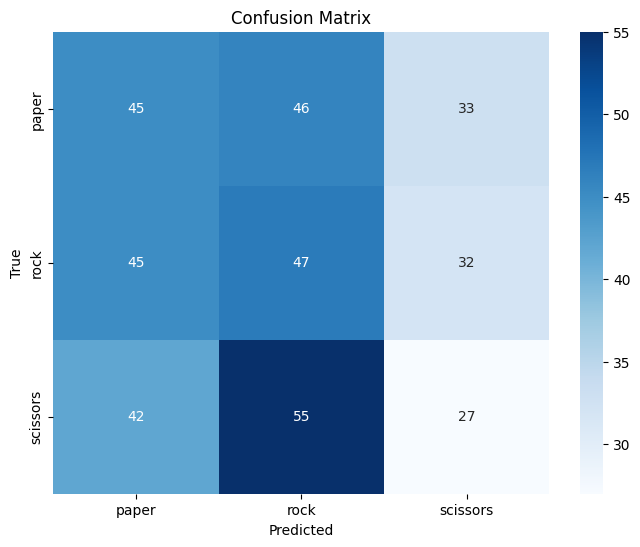

In [ ]:
# Generate and plot the confusion matrix
cm = confusion_matrix(true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()